In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve, accuracy_score, \
recall_score, precision_score, confusion_matrix, mean_absolute_error, f1_score, cohen_kappa_score, matthews_corrcoef
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,BaggingRegressor,BaggingClassifier, \
AdaBoostRegressor,AdaBoostClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from pyearth import Earth
import itertools as it
import time as time
import xgboost as xgb
import re 


from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [33]:
X_train = pd.read_csv('X_train_stratified.csv')
y_train = pd.read_csv('y_train_stratified.csv')
X_test = pd.read_csv('X_test_stratified.csv')
y_test = pd.read_csv('y_test_stratified.csv')

In [39]:
y_train.mean()

quality    5.877999
dtype: float64

In [24]:
#Defining the object to build a regression tree
model = DecisionTreeRegressor(random_state=1) 

#Fitting the regression tree to the data
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [25]:
# Maximum number of leaves
model.get_n_leaves()

1095

In [26]:
# Maximum depth
model.get_depth()

30

In [27]:
len(X_train.columns)

11

In [35]:
# coarse grid search
param_grid = {    
    'max_depth': range(2,31,2),
    'max_leaf_nodes': range(2,1096,100),
    'max_features': range(1, 12,2),
    'min_samples_leaf': range(1,10,2)
}


#Grid search to optimize parameter values
cv = KFold(n_splits = 5,shuffle=True,random_state=1)#The folds are made by preserving the percentage of samples for each class.

#Minimizing FNR is equivalent to maximizing recall
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, verbose = True)
grid_search.fit(X_train, y_train)

# make the predictions
y_pred = grid_search.predict(X_test)

print('Train accuracy : %.3f'%grid_search.best_estimator_.score(X_train, y_train))
print('Test accuracy : %.3f'%grid_search.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%grid_search.best_score_)

print('Best params for recall')
print(grid_search.best_params_)

Fitting 5 folds for each of 4950 candidates, totalling 24750 fits
Train accuracy : 0.417
Test accuracy : 0.317
Best Accuracy Through Grid Search : -0.548
Best params for recall
{'max_depth': 6, 'max_features': 11, 'max_leaf_nodes': 102, 'min_samples_leaf': 9}


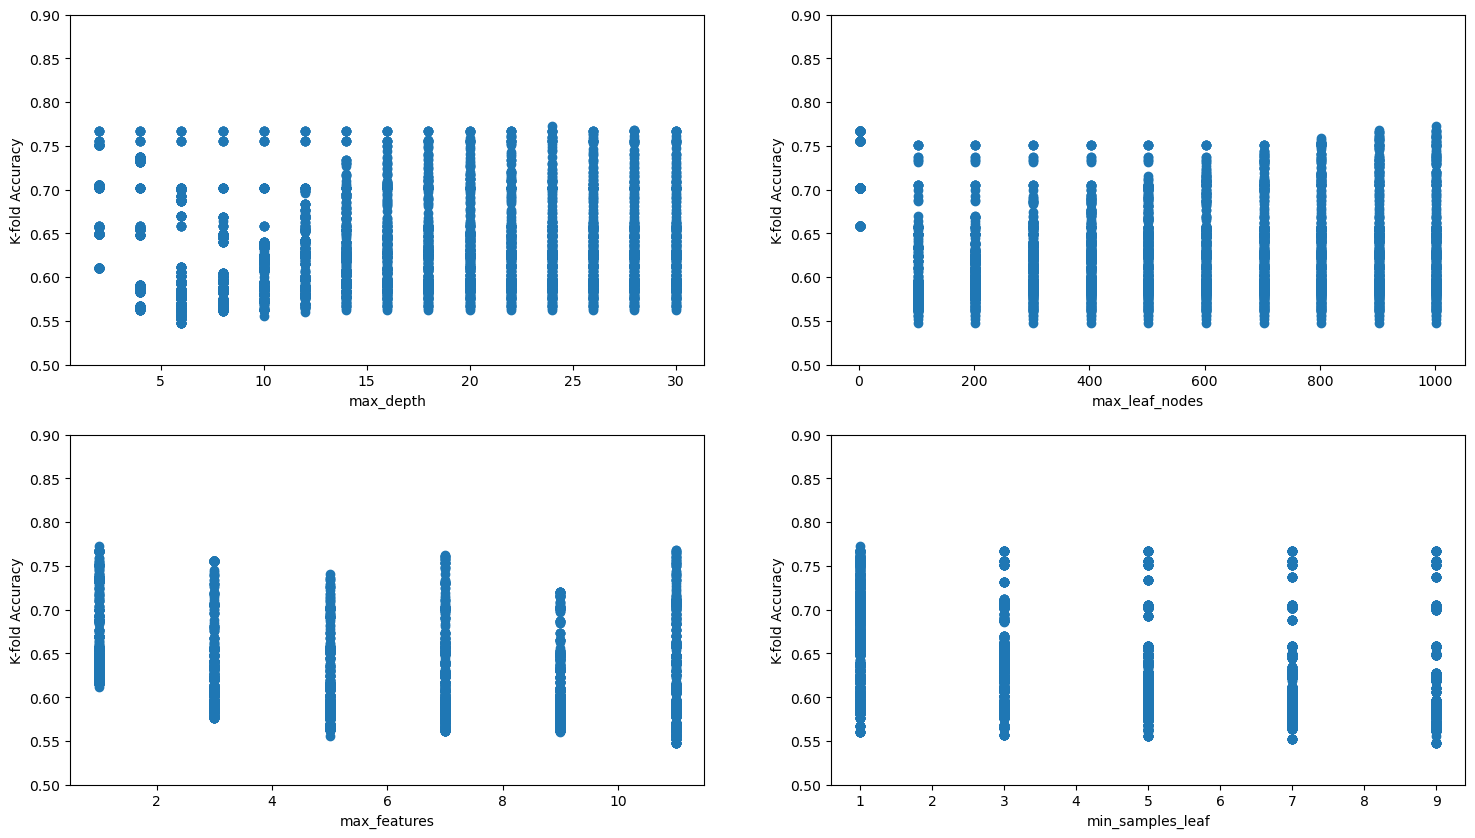

In [38]:
cv_results = pd.DataFrame(grid_search.cv_results_)
fig, axes = plt.subplots(2,2,figsize=(18,10))
plt.subplots_adjust(wspace=0.2)
axes[0,0].plot(cv_results.param_max_depth, -cv_results.mean_test_score, 'o')
axes[0,0].set_ylim([0.5,0.9])
axes[0,0].set_xlabel('max_depth')
axes[0,0].set_ylabel('K-fold Accuracy')
axes[0,1].plot(cv_results.param_max_leaf_nodes, -cv_results.mean_test_score, 'o')
axes[0,1].set_ylim([0.5,0.9])
axes[0,1].set_xlabel('max_leaf_nodes')
axes[0,1].set_ylabel('K-fold Accuracy')
axes[1,0].plot(cv_results.param_max_features, -cv_results.mean_test_score, 'o')
axes[1,0].set_ylim([0.5,0.9])
axes[1,0].set_xlabel('max_features')
axes[1,0].set_ylabel('K-fold Accuracy')
axes[1,1].plot(cv_results.param_min_samples_leaf, -cv_results.mean_test_score, 'o')
axes[1,1].set_ylim([0.5,0.9])
axes[1,1].set_xlabel('min_samples_leaf')
axes[1,1].set_ylabel('K-fold Accuracy');

In [ ]:
# coarse grid search
param_grid = {    
    'max_depth': range(2,31,2),
    'max_leaf_nodes': range(2,1096,100),
    'max_features': range(1, 12,2),
    'min_samples_leaf': range(1,10,2)
}


#Grid search to optimize parameter values
cv = KFold(n_splits = 5,shuffle=True,random_state=1)#The folds are made by preserving the percentage of samples for each class.

#Minimizing FNR is equivalent to maximizing recall
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, verbose = True)
grid_search.fit(X_train, y_train)

# make the predictions
y_pred = grid_search.predict(X_test)

print('Train accuracy : %.3f'%grid_search.best_estimator_.score(X_train, y_train))
print('Test accuracy : %.3f'%grid_search.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%grid_search.best_score_)

print('Best params for recall')
print(grid_search.best_params_)

In [ ]:
# coarse grid search
param_grid = {    
    'max_depth': range(2,31,2),
    'max_leaf_nodes': range(2,1096,100),
    'max_features': range(1, 12,2),
    'min_samples_leaf': range(1,10,2)
}


#Grid search to optimize parameter values
cv = KFold(n_splits = 5,shuffle=True,random_state=1)#The folds are made by preserving the percentage of samples for each class.

#Minimizing FNR is equivalent to maximizing recall
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, verbose = True)
grid_search.fit(X_train, y_train)

# make the predictions
y_pred = grid_search.predict(X_test)

print('Train accuracy : %.3f'%grid_search.best_estimator_.score(X_train, y_train))
print('Test accuracy : %.3f'%grid_search.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%grid_search.best_score_)

print('Best params for recall')
print(grid_search.best_params_)

In [31]:
model = DecisionTreeRegressor(random_state=1, max_depth = 6, max_features = 11, 
                              max_leaf_nodes= 102, min_samples_leaf = 9)
model.fit(X_train, y_train)
pred = model.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

0.7322219445628427

In [3]:
#Defining the object to build a regression tree
model = DecisionTreeClassifier(random_state=1) 

#Fitting the regression tree to the data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# coarse grid search
param_grid = {    
    'max_depth': range(2,26,2),
    'max_leaf_nodes': range(2,1038,100),
    'max_features': range(1, 12,2),
    'min_samples_leaf': range(1,10,2)
}


#Grid search to optimize parameter values
skf = StratifiedKFold(n_splits=2)#The folds are made by preserving the percentage of samples for each class.

#Minimizing FNR is equivalent to maximizing recall
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1, class_weight = 'balanced'), param_grid, scoring=['f1_weighted','accuracy', 'cohen_kappa_score'], refit= 'f1_weighted', cv=skf, n_jobs=-1, verbose = True)
grid_search.fit(X_train, y_train)

# make the predictions
y_pred = grid_search.predict(X_test)

print('Train accuracy : %.3f'%grid_search.best_estimator_.score(X_train, y_train))
print('Test accuracy : %.3f'%grid_search.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%grid_search.best_score_)

print('Best params for recall')
print(grid_search.best_params_)

In [5]:
# coarse grid search
param_grid = {    
    'max_depth': range(2,26,2),
    'max_leaf_nodes': range(2,1038,100),
    'max_features': range(1, 12,2),
    'min_samples_leaf': range(1,10,2)
}


#Grid search to optimize parameter values
skf = StratifiedKFold(n_splits=2)#The folds are made by preserving the percentage of samples for each class.

#Minimizing FNR is equivalent to maximizing recall
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1, class_weight = 'balanced'), param_grid, scoring=['f1_weighted','accuracy'], refit= 'f1_weighted', cv=skf, n_jobs=-1, verbose = True)
grid_search.fit(X_train, y_train)

# make the predictions
y_pred = grid_search.predict(X_test)

print('Train accuracy : %.3f'%grid_search.best_estimator_.score(X_train, y_train))
print('Test accuracy : %.3f'%grid_search.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%grid_search.best_score_)

print('Best params for recall')
print(grid_search.best_params_)

Fitting 2 folds for each of 3960 candidates, totalling 7920 fits
Train accuracy : 0.816
Test accuracy : 0.509
Best Accuracy Through Grid Search : 0.535
Best params for recall
{'max_depth': 18, 'max_features': 5, 'max_leaf_nodes': 702, 'min_samples_leaf': 1}


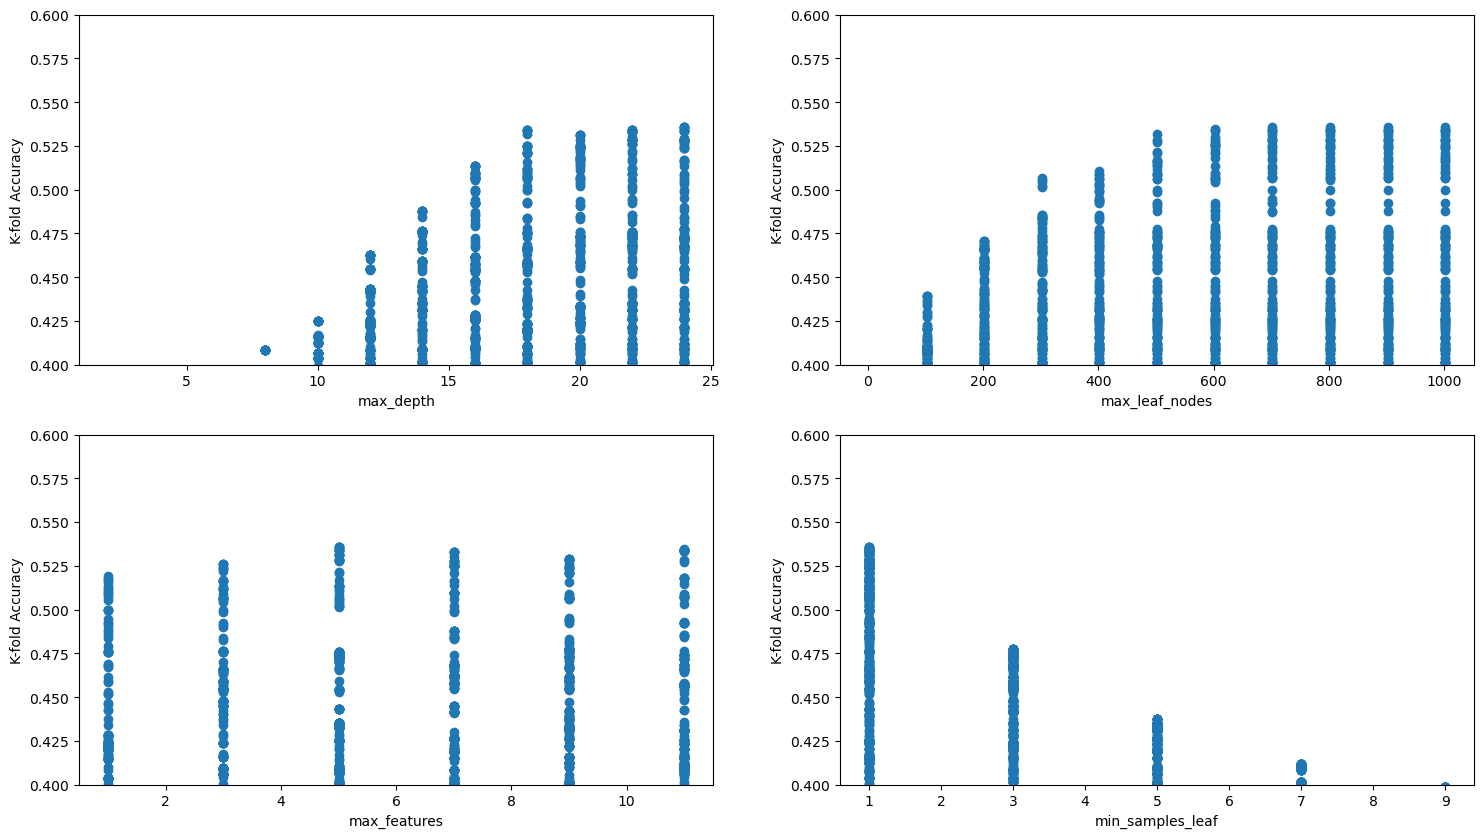

In [6]:
cv_results = pd.DataFrame(grid_search.cv_results_)
fig, axes = plt.subplots(2,2,figsize=(18,10))
plt.subplots_adjust(wspace=0.2)
axes[0,0].plot(cv_results.param_max_depth, cv_results.mean_test_accuracy, 'o')
axes[0,0].set_ylim([0.4, 0.6])
axes[0,0].set_xlabel('max_depth')
axes[0,0].set_ylabel('K-fold Accuracy')
axes[0,1].plot(cv_results.param_max_leaf_nodes, cv_results.mean_test_accuracy, 'o')
axes[0,1].set_ylim([0.4, 0.6])
axes[0,1].set_xlabel('max_leaf_nodes')
axes[0,1].set_ylabel('K-fold Accuracy')
axes[1,0].plot(cv_results.param_max_features, cv_results.mean_test_accuracy, 'o')
axes[1,0].set_ylim([0.4, 0.6])
axes[1,0].set_xlabel('max_features')
axes[1,0].set_ylabel('K-fold Accuracy')
axes[1,1].plot(cv_results.param_min_samples_leaf, cv_results.mean_test_accuracy, 'o')
axes[1,1].set_ylim([0.4, 0.6])
axes[1,1].set_xlabel('min_samples_leaf')
axes[1,1].set_ylabel('K-fold Accuracy');

In [7]:
# finer grid search
param_grid = {    
    'max_depth': range(18,25),
    'max_leaf_nodes': range(500,1038,50),
    'max_features': range(1,12)
}


#Grid search to optimize parameter values
skf = StratifiedKFold(n_splits=2)#The folds are made by preserving the percentage of samples for each class.

#Minimizing FNR is equivalent to maximizing recall
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1, class_weight = 'balanced'), param_grid, scoring=['f1_weighted','accuracy'], refit= 'f1_weighted', cv=skf, n_jobs=-1, verbose = True)
grid_search.fit(X_train, y_train)

# make the predictions
y_pred = grid_search.predict(X_test)

print('Train accuracy : %.3f'%grid_search.best_estimator_.score(X_train, y_train))
print('Test accuracy : %.3f'%grid_search.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%grid_search.best_score_)

print('Best params for recall')
print(grid_search.best_params_)

Fitting 2 folds for each of 847 candidates, totalling 1694 fits
Train accuracy : 0.855
Test accuracy : 0.534
Best Accuracy Through Grid Search : 0.537
Best params for recall
{'max_depth': 20, 'max_features': 4, 'max_leaf_nodes': 750}


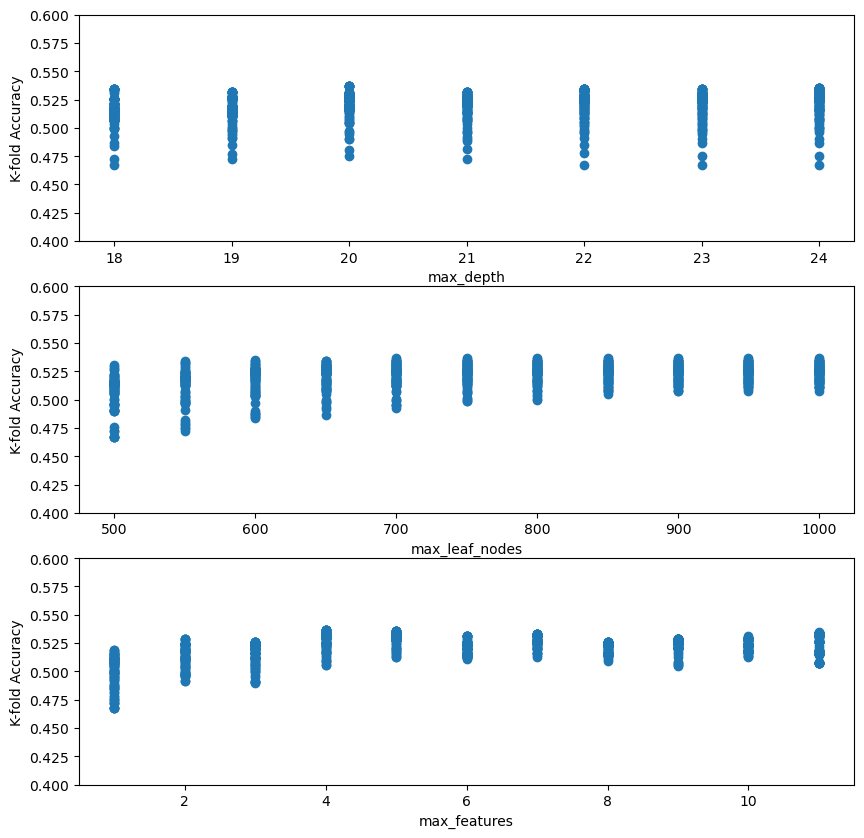

In [8]:
cv_results = pd.DataFrame(grid_search.cv_results_)
fig, axes = plt.subplots(3,1,figsize=(10,10))
plt.subplots_adjust(wspace=0.2)
axes[0].plot(cv_results.param_max_depth, cv_results.mean_test_accuracy, 'o')
axes[0].set_ylim([0.4, 0.6])
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('K-fold Accuracy')
axes[1].plot(cv_results.param_max_leaf_nodes, cv_results.mean_test_accuracy, 'o')
axes[1].set_ylim([0.4, 0.6])
axes[1].set_xlabel('max_leaf_nodes')
axes[1].set_ylabel('K-fold Accuracy')
axes[2].plot(cv_results.param_max_features, cv_results.mean_test_accuracy, 'o')
axes[2].set_ylim([0.4, 0.6])
axes[2].set_xlabel('max_features')
axes[2].set_ylabel('K-fold Accuracy');

In [9]:
# finer grid search
param_grid = {    
    'max_depth': range(14,24),
    'max_leaf_nodes': range(700,1038),
    'max_features': range(4,12)
}


#Grid search to optimize parameter values
skf = StratifiedKFold(n_splits=2)#The folds are made by preserving the percentage of samples for each class.

#Minimizing FNR is equivalent to maximizing recall
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1, class_weight = 'balanced'), param_grid, scoring=['f1_weighted','accuracy'], refit= 'accuracy', cv=skf, n_jobs=-1, verbose = True)
grid_search.fit(X_train, y_train)

# make the predictions
y_pred = grid_search.predict(X_test)

print('Train accuracy : %.3f'%grid_search.best_estimator_.score(X_train, y_train))
print('Test accuracy : %.3f'%grid_search.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%grid_search.best_score_)

print('Best params for recall')
print(grid_search.best_params_)

Fitting 2 folds for each of 27040 candidates, totalling 54080 fits
Train accuracy : 0.841
Test accuracy : 0.536
Best Accuracy Through Grid Search : 0.537
Best params for recall
{'max_depth': 20, 'max_features': 4, 'max_leaf_nodes': 702}


In [10]:
#Defining the object to build a classification tree
model = DecisionTreeClassifier(random_state=1, max_depth=20, max_features=4, max_leaf_nodes=702) 

#Fitting the regression tree to the data
model.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)



In [22]:
cross_val_ypred = cross_val_predict(DecisionTreeClassifier(random_state=1, max_depth=20, max_features=4, max_leaf_nodes=702), X_train, 
                                              y_train, cv = 2, method = 'predict_proba')

fpr, tpr, auc_thresholds = roc_curve(train_y, cross_val_ypred[:,1])
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot(fpr, tpr, 'o', color = 'blue')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, cross_val_ypred[:,1])
plot_roc_curve(fpr, tpr)

/Users/aartipappu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1092: RuntimeWarning: Number of classes in training fold (7) does not match total number of classes (1). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(


IndexError: index 1 is out of bounds for axis 1 with size 1

In [20]:
#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test))  

#Computing the precision and recall
print("F1 Weighted: ", f1_score(y_test, y_pred, average = 'weighted'))
print("Kappa Score: ", cohen_kappa_score(y_test, y_pred)) # Humble moderate
print("Matthew Correlation: ", matthews_corrcoef(y_test, y_pred)) #moderately strong correlation


#print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
#cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
           #       columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
#sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

Accuracy:  0.5357142857142857
F1 Weighted:  0.538414189526775
Kappa Score:  0.34138423044314403
Matthew Correlation:  0.34532020605239083
